# Problem 1.

## 1.

In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv('./movie.csv')


In [23]:
print(data.head())

               Title  Unknown  Action  Adventure  Animation  Childrens  \
0   Toy Story (1995)        0       0          0          1          1   
1   GoldenEye (1995)        0       1          1          0          0   
2  Four Rooms (1995)        0       0          0          0          0   
3  Get Shorty (1995)        0       1          0          0          0   
4     Copycat (1995)        0       0          0          0          0   

   Comedy  Crime  Documentary  Drama  Fantasy  FilmNoir  Horror  Musical  \
0       1      0            0      0        0         0       0        0   
1       0      0            0      0        0         0       0        0   
2       0      0            0      0        0         0       0        0   
3       1      0            0      1        0         0       0        0   
4       0      1            0      1        0         0       0        0   

   Mystery  Romance  SciFi  Thriller  War  Western  
0        0        0      0         0    0    

In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1664 non-null   object
 1   Unknown      1664 non-null   int64 
 2   Action       1664 non-null   int64 
 3   Adventure    1664 non-null   int64 
 4   Animation    1664 non-null   int64 
 5   Childrens    1664 non-null   int64 
 6   Comedy       1664 non-null   int64 
 7   Crime        1664 non-null   int64 
 8   Documentary  1664 non-null   int64 
 9   Drama        1664 non-null   int64 
 10  Fantasy      1664 non-null   int64 
 11  FilmNoir     1664 non-null   int64 
 12  Horror       1664 non-null   int64 
 13  Musical      1664 non-null   int64 
 14  Mystery      1664 non-null   int64 
 15  Romance      1664 non-null   int64 
 16  SciFi        1664 non-null   int64 
 17  Thriller     1664 non-null   int64 
 18  War          1664 non-null   int64 
 19  Western      1664 non-null 

In [25]:
genre_counts = data.iloc[:, 2:].sum() # unknown 제외
print("The number of movies included in each genre:")
print(genre_counts)

The number of movies included in each genre:
Action         249
Adventure      133
Animation       42
Childrens      120
Comedy         502
Crime          107
Documentary     50
Drama          716
Fantasy         22
FilmNoir        24
Horror          90
Musical         56
Mystery         60
Romance        244
SciFi          100
Thriller       248
War             71
Western         27
dtype: int64


In [26]:
print(f"Which genre includes the most movies?: {genre_counts.idxmax()}")
print(f"Which genre includes the fewest movies?: {genre_counts.idxmin()}")

Which genre includes the most movies?: Drama
Which genre includes the fewest movies?: Fantasy


In [27]:
genre_counts_per_movie = data.iloc[:, 2:].sum(axis=1)
average_genres = genre_counts_per_movie.mean()
print(f"The average number of genres a movie belongs to: {average_genres:.2f}")

The average number of genres a movie belongs to: 1.72


In [28]:
max_genres = genre_counts_per_movie.max()
movies_with_max_genres = data.loc[genre_counts_per_movie == max_genres, 'Title'] 

print(f"The movie(s) that belong to the highest number of genres:{movies_with_max_genres.tolist()}")
print(f"How many genres does this movie belong to?: {max_genres}")

The movie(s) that belong to the highest number of genres:['Empire Strikes Back, The (1980)', 'Transformers: The Movie, The (1986)', "Kid in King Arthur's Court, A (1995)"]
How many genres does this movie belong to?: 6


## 2. hierarchical clustering

### (a)

In [29]:
genre_data = data.iloc[:, 2:]
linkage_criteria = ['average', 'complete', 'single']  # Average, Complete, Single Linkage
dendrograms = {}

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

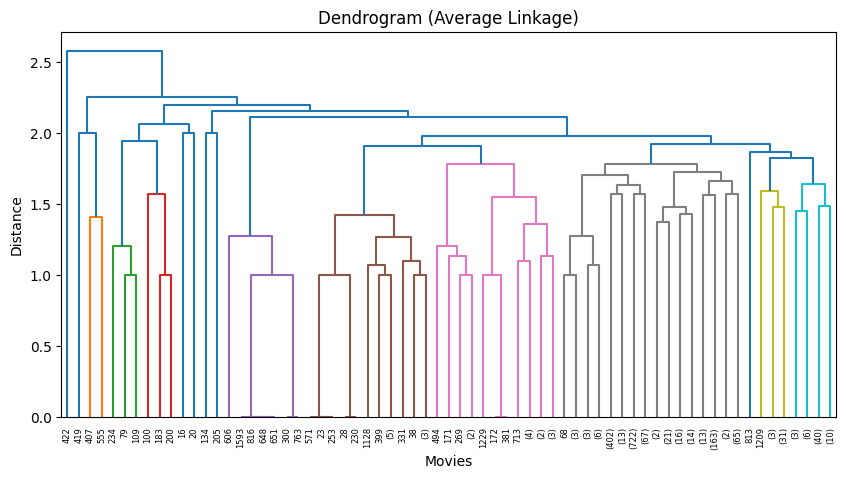

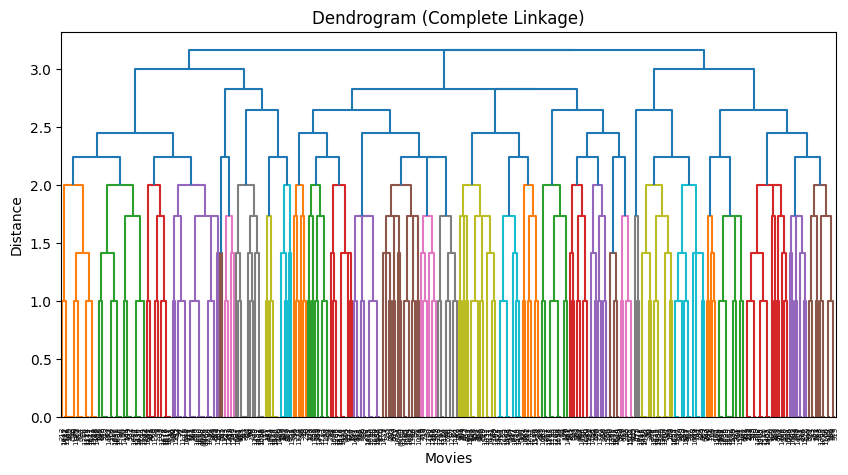

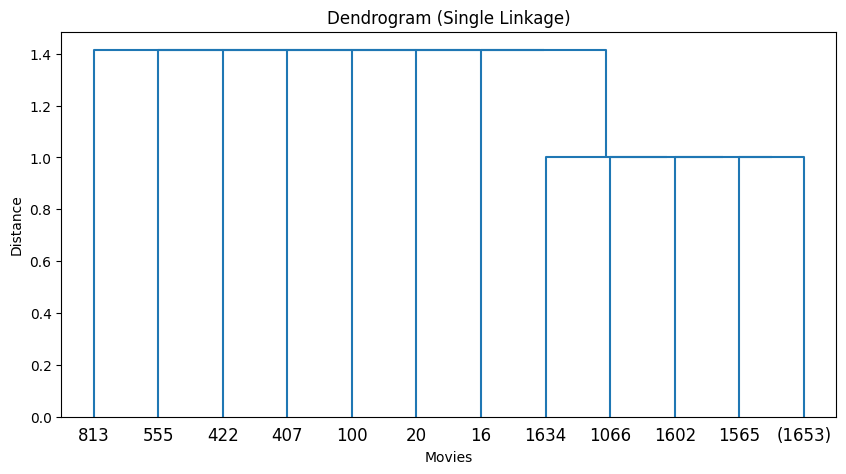

In [31]:
for criteria in linkage_criteria:
    # Perform hierarchical clustering
    Z = linkage(genre_data, method=criteria)  # linkage 함수를 사용해 계층적 군집화 수행
    dendrograms[criteria] = Z  # 결과 저장

    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogram ({criteria.capitalize()} Linkage)")
    dendrogram(Z, truncate_mode='level', p=10)
    plt.xlabel('Movies')
    plt.ylabel('Distance')
    plt.show()

### (b)

### Average Linkage

- cluster형성 시, the ranges of height values가 적당하여 분리가 적당히 일어난다. 가장 일반적이고 시각적으로 와닿는 것 같다.
- 중간 정도의 밀도와 크기를 가진 클러스터가 형성된다.

### Complete Linkage

- clustering이 상당히 많이 이루어져 있다.
- the ranges of height values가 크며 가장 거리가 큰 경우까지 merge한다
- 가장 먼 거리 기준으로 merge하므로, 분리가 상당히 많이 일어나고 밀도가 높다.

### Single Linkage

- clustering이 거의 이루어지지 않는다.
- the ranges of height values가 작으며 거리가 짧은 경우까지만 merge한다.
- 클러스터 분리가 명확하지 않고, 거의 분리가 일어나지 않는다.



### (c)

In [32]:
clusters = {}

for criteria in linkage_criteria:
    clusters[criteria] = fcluster(dendrograms[criteria], t=10, criterion='maxclust')

# Compare the distribution of the number of movies in each cluster
cluster_distributions = {}
for criteria in linkage_criteria:
    cluster_distributions[criteria] = pd.Series(clusters[criteria]).value_counts()
    print(f"Cluster distribution for {criteria.capitalize()} linkage:")
    print(cluster_distributions[criteria])

Cluster distribution for Average linkage:
9     1643
8        7
3        6
1        2
4        1
5        1
6        1
7        1
2        1
10       1
Name: count, dtype: int64
Cluster distribution for Complete linkage:
1    602
4    446
6    198
8    154
7    106
5     90
3     59
2      9
Name: count, dtype: int64
Cluster distribution for Single linkage:
1    1657
2       1
3       1
4       1
5       1
6       1
7       1
8       1
Name: count, dtype: int64


### Average Linkage
- 1643개 영화 가진 하나의 클러스터와, 나머지 클러스터로 구성되었다.
- 분리가 잘 이루어지지 않았다.

### Complete Linkage
- 클러스터 간 균형이 잘 잡혀있다.
- 그룹 간 차이를 분석하기에 적합해보인다.

### Single Linkage
- 1657개 영화 가진 하나의 클러스터가 있고, 나머지 클러스터는 단 1개씩의 영화만 가지고 있다.
- 분리가 잘 이루어지지 않았다.

## 3. k-means clustering

### (a)

In [33]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle


In [34]:
# genre_data = data.iloc[:, 2:]


objective_values = {}

for n_init in [10, 100, 1000]:
    kmeans = KMeans(n_clusters=10, n_init=n_init, random_state=123)
    kmeans.fit(genre_data)

    objective_values[n_init] = kmeans.inertia_

In [35]:
for n_init, wcss in objective_values.items():
    print(f"n_init = {n_init}: within-cluster sum of squares = {wcss}")

n_init = 10: within-cluster sum of squares = 923.4500191064853
n_init = 100: within-cluster sum of squares = 908.8065008196369
n_init = 1000: within-cluster sum of squares = 900.8112007412965


- n_init이 커질수록, ssw는 작아진다.

### (b)

In [36]:
kmeans_1000 = KMeans(n_clusters=10, n_init=1000, random_state=123)
kmeans_1000.fit(genre_data)

KMeans(n_clusters=10, n_init=1000, random_state=123)

In [37]:
cluster_labels = kmeans_1000.labels_
cluster_distribution = pd.Series(cluster_labels).value_counts()

print("\nCluster distribution:")
print(cluster_distribution)


Cluster distribution:
1    523
0    296
2    170
8    154
4    116
3     96
5     85
6     78
7     76
9     70
Name: count, dtype: int64


- 상대적으로 hierarchical clustering에 비해 더 나은 clustering이 되었다.

In [38]:
# Calculate the number of movies per cluster
cluster_genre_counts = genre_data.groupby(cluster_labels).sum()

cluster_genre_proportions = cluster_genre_counts.div(cluster_genre_counts.sum(axis=1), axis=0) * 100

print("\nProportion of movies belonging to each genre per cluster:")
print(cluster_genre_proportions)



Proportion of movies belonging to each genre per cluster:
      Action  Adventure  Animation  Childrens     Comedy     Crime  \
0   3.750000   0.250000   1.000000   7.000000  74.000000  1.750000   
1   3.506311   0.561010   0.000000   1.683029   0.000000  5.189341   
2  20.000000   4.102564   0.512821   0.256410   0.769231  5.897436   
3   0.888889   0.888889   0.444444   0.444444  42.666667  0.000000   
4  40.140845  20.422535   0.352113   2.112676   3.169014  4.577465   
5   3.045685   0.507614   0.000000   0.000000   0.000000  2.030457   
6   1.754386   0.584795   0.000000   1.169591  45.614035  2.339181   
7   3.478261   0.000000   0.000000   0.000000   9.565217  1.739130   
8   0.000000   6.818182   1.704545   0.000000   0.000000  9.659091   
9   1.052632  20.000000  16.315789  36.842105   4.736842  0.000000   

   Documentary      Drama   Fantasy  FilmNoir     Horror    Musical   Mystery  \
0     0.250000   0.000000  1.000000  0.000000   0.000000   2.500000  1.500000   
1     0.

- 각 클러스터 별 영화 장르의 비율을 볼 수 있다. 

In [39]:
top_genres_per_cluster = cluster_genre_proportions.idxmax(axis=1)

print("\nMain genre for each cluster:")
print(top_genres_per_cluster)


Main genre for each cluster:
0         Comedy
1          Drama
2       Thriller
3         Comedy
4         Action
5          Drama
6         Comedy
7         Horror
8    Documentary
9      Childrens
dtype: object


- 클러스터 별 가장 많은 장르를 표시하였다.

### (d)

In [40]:
titanic_index = data[data['Title'] == 'Titanic (1997)'].index[0]
titanic_cluster = cluster_labels[titanic_index]

print(f"\n'Titanic (1997)' belongs to cluster {titanic_cluster}.")

recommended_movies = data.loc[cluster_labels == titanic_cluster].sample(5, random_state=123)
print("\nRecommended movies from the same genre as 'Titanic (1997)':")
print(recommended_movies['Title'].tolist())


'Titanic (1997)' belongs to cluster 5.

Recommended movies from the same genre as 'Titanic (1997)':
['Beautiful Thing (1996)', "'Til There Was You (1997)", 'Diva (1981)', 'Professional, The (1994)', 'Circle of Friends (1995)']


### (e) k=5

In [41]:
kmeans_1000_5 = KMeans(n_clusters=5, n_init=1000, random_state=123)
kmeans_1000_5.fit(genre_data)

cluster_labels = kmeans_1000_5.labels_
cluster_distribution = pd.Series(cluster_labels).value_counts()

print("\nCluster distribution:")
print(cluster_distribution)


Cluster distribution:
3    564
0    486
1    257
4    192
2    165
Name: count, dtype: int64


In [42]:
# Calculate the number of movies per cluster
cluster_genre_counts = genre_data.groupby(cluster_labels).sum()

cluster_genre_proportions = cluster_genre_counts.div(cluster_genre_counts.sum(axis=1), axis=0) * 100

print("\nProportion of movies belonging to each genre per cluster:")
print(cluster_genre_proportions)



Proportion of movies belonging to each genre per cluster:
      Action  Adventure  Animation  Childrens     Comedy     Crime  \
0   2.142857   0.952381   1.190476   4.761905  57.857143  1.428571   
1   0.000000  10.803324   7.756233  14.958449   0.000000  4.709141   
2   2.816901   0.845070   0.281690   0.000000   0.845070  8.450704   
3   3.602484   1.118012   0.000000   2.111801   0.000000  3.850932   
4  38.400000  14.800000   0.600000   1.800000   2.600000  3.400000   

   Documentary      Drama   Fantasy  FilmNoir     Horror   Musical   Mystery  \
0     0.119048  10.476190  0.833333  0.000000   1.309524  2.380952  0.952381   
1    12.742382   0.000000  1.939058  2.216066  13.019391  6.925208  2.216066   
2     0.000000  16.901408  0.281690  3.943662   3.943662  0.000000  7.605634   
3     0.372671  70.062112  0.372671  0.248447   0.621118  1.118012  1.242236   
4     0.000000   0.800000  0.800000  0.000000   2.600000  0.400000  1.400000   

     Romance      SciFi   Thriller     

In [43]:
top_genres_per_cluster = cluster_genre_proportions.idxmax(axis=1)

print("\nMain genre for each cluster:")
print(top_genres_per_cluster)


Main genre for each cluster:
0       Comedy
1    Childrens
2     Thriller
3        Drama
4       Action
dtype: object


In [44]:
titanic_index = data[data['Title'] == 'Titanic (1997)'].index[0]
titanic_cluster = cluster_labels[titanic_index]

print(f"\n'Titanic (1997)' belongs to cluster {titanic_cluster}.")

recommended_movies = data.loc[cluster_labels == titanic_cluster].sample(5, random_state=123)
print("\nRecommended movies from the same genre as 'Titanic (1997)':")
print(recommended_movies['Title'].tolist())


'Titanic (1997)' belongs to cluster 3.

Recommended movies from the same genre as 'Titanic (1997)':
['One Fine Day (1996)', 'Fearless (1993)', "Breakfast at Tiffany's (1961)", 'Menace II Society (1993)', 'Flower of My Secret, The (Flor de mi secreto, La) (1995)']


### (e) k=20

In [45]:
kmeans_1000_20 = KMeans(n_clusters=20, n_init=1000, random_state=123)
kmeans_1000_20.fit(genre_data)

cluster_labels = kmeans_1000_20.labels_
cluster_distribution = pd.Series(cluster_labels).value_counts()

print("\nCluster distribution:")
print(cluster_distribution)


Cluster distribution:
1     411
2     255
10     94
7      87
12     82
8      75
6      73
0      68
4      63
19     58
13     57
9      56
18     46
11     45
15     40
14     37
17     35
16     34
5      27
3      21
Name: count, dtype: int64


In [46]:
# Calculate the number of movies per cluster
cluster_genre_counts = genre_data.groupby(cluster_labels).sum()

cluster_genre_proportions = cluster_genre_counts.div(cluster_genre_counts.sum(axis=1), axis=0) * 100

print("\nProportion of movies belonging to each genre per cluster:")
print(cluster_genre_proportions)



Proportion of movies belonging to each genre per cluster:
       Action  Adventure  Animation  Childrens     Comedy      Crime  \
0   30.769231  30.769231   0.452489   0.452489   4.524887   2.714932   
1    0.000000   0.875274   0.000000   2.625821   0.000000   0.000000   
2    4.854369   0.323625   0.970874   0.000000  82.524272   2.265372   
3    0.000000   0.000000   0.000000   0.000000   0.000000  15.384615   
4   62.376238   0.000000   0.000000   2.970297   0.000000   5.940594   
5    0.000000   2.631579  35.526316  35.526316   2.631579   0.000000   
6    2.580645   0.645161   0.000000   0.000000   0.000000   1.290323   
7    1.515152   0.505051   0.000000   1.010101  43.939394   2.020202   
8    0.000000  13.793103   2.298851   0.000000   0.000000   0.000000   
9   37.583893   0.000000   0.671141   0.671141   0.671141   2.013423   
10   0.000000   0.613497   0.613497   0.000000   4.294479   7.975460   
11   6.896552   1.149425   0.000000   0.000000   0.000000  51.724138   
12   

In [47]:
top_genres_per_cluster = cluster_genre_proportions.idxmax(axis=1)

print("\nMain genre for each cluster:")
print(top_genres_per_cluster)


Main genre for each cluster:
0          Action
1           Drama
2          Comedy
3        FilmNoir
4          Action
5       Animation
6           Drama
7          Comedy
8         Romance
9          Action
10       Thriller
11          Crime
12         Comedy
13          Drama
14          Drama
15      Childrens
16      Childrens
17          SciFi
18    Documentary
19         Horror
dtype: object


In [48]:
titanic_index = data[data['Title'] == 'Titanic (1997)'].index[0]
titanic_cluster = cluster_labels[titanic_index]

print(f"\n'Titanic (1997)' belongs to cluster {titanic_cluster}.")

recommended_movies = data.loc[cluster_labels == titanic_cluster].sample(5, random_state=123)
print("\nRecommended movies from the same genre as 'Titanic (1997)':")
print(recommended_movies['Title'].tolist())


'Titanic (1997)' belongs to cluster 6.

Recommended movies from the same genre as 'Titanic (1997)':
['Rough Magic (1995)', 'Feeling Minnesota (1996)', 'Country Life (1994)', 'Chungking Express (1994)', 'Some Kind of Wonderful (1987)']


# 4. Content-based filtering

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

# genre_data = data.iloc[:, 2:]
titles = data['Title']

cosine_sim = cosine_similarity(genre_data)

In [50]:
titanic_index = data[data['Title'] == 'Titanic (1997)'].index[0]
twelve_monkeys_index = data[data['Title'] == 'Twelve Monkeys (1995)'].index[0]

titanic_similarities = cosine_sim[titanic_index]
twelve_monkeys_similarities = cosine_sim[twelve_monkeys_index]

combined_scores = titanic_similarities * 5 - twelve_monkeys_similarities * 1

In [51]:
recommended_indices = combined_scores.argsort()[::-1]
recommended_indices = [i for i in recommended_indices if i not in [titanic_index, twelve_monkeys_index]]

# Get the top 5 recommended movies
top_5_movies = titles.iloc[recommended_indices[:5]]

# Print the recommended movies
print("\nTop 5 recommended movies for the user:")
print(top_5_movies.tolist())


Top 5 recommended movies for the user:
['Man in the Iron Mask, The (1998)', 'Cyrano de Bergerac (1990)', 'Top Gun (1986)', 'Days of Thunder (1990)', 'Crying Game, The (1992)']
